# Pengujian Pengaruh Regularization Pada FFNN

Pengujian ini bertujuan untuk menganalisis pengaruh L1 dan L2 regularization pada performa model FFNN

In [3]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Add parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

%load_ext autoreload
%autoreload 2

from model import FFNN
from activation import ReLU, Softmax
from loss import CategoricalCrossEntropy
from regularizers import NoRegularizer, L1Regularizer, L2Regularizer
from layer import Layer
from utils import train_and_evaluate, load_mnist_data

# Create out dir
os.makedirs("../../out", exist_ok=True)

In [4]:
def create_model_with_regularizer(input_size, hidden_size, output_size, regularizer):
    """
    Create a model with the specified regularizer for all layers
    """
    model = FFNN(
        layer_sizes=[input_size, hidden_size, output_size],
        activations=[ReLU(), Softmax()],
        loss=CategoricalCrossEntropy()
    )
    
    # Replace the default regularizers with the specified one
    model.layers = []
    for i in range(len(model.layer_sizes) - 1):
        model.layers.append(Layer(
            input_size=model.layer_sizes[i],
            output_size=model.layer_sizes[i + 1],
            activation=model.activations[i],
            regularizer=regularizer
        ))
    
    return model

Loading MNIST dataset...
Data loaded: X_train: (56000, 784), y_train: (56000,)
Test data: X_test: (14000, 784), y_test: (14000,)

Training model with None regularization

Training FFNN with None regularization...


Epoch 1/10: 100%|██████████| 1750/1750 [00:10<00:00, 170.64batch/s, loss=0.1424]


Epoch 1/10 - loss: 0.2517, val_loss: 0.1983


Epoch 2/10: 100%|██████████| 1750/1750 [00:09<00:00, 177.88batch/s, loss=0.1579]


Epoch 2/10 - loss: 0.1674, val_loss: 0.2079


Epoch 3/10: 100%|██████████| 1750/1750 [00:10<00:00, 173.28batch/s, loss=0.0398]


Epoch 3/10 - loss: 0.1445, val_loss: 0.2163


Epoch 4/10: 100%|██████████| 1750/1750 [00:10<00:00, 160.96batch/s, loss=0.0108]


Epoch 4/10 - loss: 0.1356, val_loss: 0.1975


Epoch 5/10: 100%|██████████| 1750/1750 [00:11<00:00, 156.56batch/s, loss=0.3144]


Epoch 5/10 - loss: 0.1224, val_loss: 0.1876


Epoch 6/10: 100%|██████████| 1750/1750 [00:12<00:00, 142.82batch/s, loss=0.1783]


Epoch 6/10 - loss: 0.1175, val_loss: 0.2114


Epoch 7/10: 100%|██████████| 1750/1750 [00:12<00:00, 142.28batch/s, loss=0.4064]


Epoch 7/10 - loss: 0.1167, val_loss: 0.2132


Epoch 8/10: 100%|██████████| 1750/1750 [00:11<00:00, 151.74batch/s, loss=0.0680]


Epoch 8/10 - loss: 0.1071, val_loss: 0.2570


Epoch 9/10: 100%|██████████| 1750/1750 [00:12<00:00, 137.40batch/s, loss=0.4902]


Epoch 9/10 - loss: 0.1061, val_loss: 0.2293


Epoch 10/10: 100%|██████████| 1750/1750 [00:12<00:00, 140.55batch/s, loss=0.2957]


Epoch 10/10 - loss: 0.0974, val_loss: 0.2570
Training took 114.19 seconds
FFNN with None regularization accuracy: 0.9591

Training model with L1 regularization

Training FFNN with L1 regularization...


Epoch 1/10: 100%|██████████| 1750/1750 [00:11<00:00, 156.72batch/s, loss=0.3796]


Epoch 1/10 - loss: 0.5176, val_loss: 0.4745


Epoch 2/10: 100%|██████████| 1750/1750 [00:11<00:00, 157.06batch/s, loss=0.6601]


Epoch 2/10 - loss: 0.4775, val_loss: 0.4679


Epoch 3/10: 100%|██████████| 1750/1750 [00:10<00:00, 162.01batch/s, loss=0.4481]


Epoch 3/10 - loss: 0.4702, val_loss: 0.4812


Epoch 4/10: 100%|██████████| 1750/1750 [00:10<00:00, 161.91batch/s, loss=0.2757]


Epoch 4/10 - loss: 0.4705, val_loss: 0.4569


Epoch 5/10: 100%|██████████| 1750/1750 [00:10<00:00, 159.59batch/s, loss=0.7214]


Epoch 5/10 - loss: 0.4681, val_loss: 0.4646


Epoch 6/10: 100%|██████████| 1750/1750 [00:11<00:00, 153.47batch/s, loss=0.5288]


Epoch 6/10 - loss: 0.4662, val_loss: 0.4429


Epoch 7/10: 100%|██████████| 1750/1750 [00:11<00:00, 156.43batch/s, loss=0.4400]


Epoch 7/10 - loss: 0.4632, val_loss: 0.4524


Epoch 8/10: 100%|██████████| 1750/1750 [00:11<00:00, 154.72batch/s, loss=0.4309]


Epoch 8/10 - loss: 0.4673, val_loss: 0.5033


Epoch 9/10: 100%|██████████| 1750/1750 [00:11<00:00, 156.65batch/s, loss=0.3433]


Epoch 9/10 - loss: 0.4639, val_loss: 0.4481


Epoch 10/10: 100%|██████████| 1750/1750 [00:10<00:00, 161.45batch/s, loss=0.2451]


Epoch 10/10 - loss: 0.4602, val_loss: 0.4857
Training took 111.52 seconds
FFNN with L1 regularization accuracy: 0.8580

Training model with L2 regularization

Training FFNN with L2 regularization...


Epoch 1/10: 100%|██████████| 1750/1750 [00:11<00:00, 157.08batch/s, loss=0.2328]


Epoch 1/10 - loss: 0.3840, val_loss: 0.3262


Epoch 2/10: 100%|██████████| 1750/1750 [00:10<00:00, 163.17batch/s, loss=0.2938]


Epoch 2/10 - loss: 0.3452, val_loss: 0.3396


Epoch 3/10: 100%|██████████| 1750/1750 [00:09<00:00, 176.32batch/s, loss=0.5767]


Epoch 3/10 - loss: 0.3476, val_loss: 0.3290


Epoch 4/10: 100%|██████████| 1750/1750 [00:09<00:00, 177.56batch/s, loss=0.5656]


Epoch 4/10 - loss: 0.3433, val_loss: 0.3289


Epoch 5/10: 100%|██████████| 1750/1750 [00:10<00:00, 160.31batch/s, loss=0.1871]


Epoch 5/10 - loss: 0.3482, val_loss: 0.3116


Epoch 6/10: 100%|██████████| 1750/1750 [00:09<00:00, 176.25batch/s, loss=0.2626]


Epoch 6/10 - loss: 0.3430, val_loss: 0.3477


Epoch 7/10: 100%|██████████| 1750/1750 [00:10<00:00, 166.86batch/s, loss=0.4059]


Epoch 7/10 - loss: 0.3424, val_loss: 0.3722


Epoch 8/10: 100%|██████████| 1750/1750 [00:10<00:00, 163.03batch/s, loss=0.3033]


Epoch 8/10 - loss: 0.3444, val_loss: 0.3358


Epoch 9/10: 100%|██████████| 1750/1750 [00:10<00:00, 167.56batch/s, loss=0.1822]


Epoch 9/10 - loss: 0.3460, val_loss: 0.3274


Epoch 10/10: 100%|██████████| 1750/1750 [00:10<00:00, 159.41batch/s, loss=0.3502]


Epoch 10/10 - loss: 0.3467, val_loss: 0.3346
Training took 105.87 seconds
FFNN with L2 regularization accuracy: 0.9029


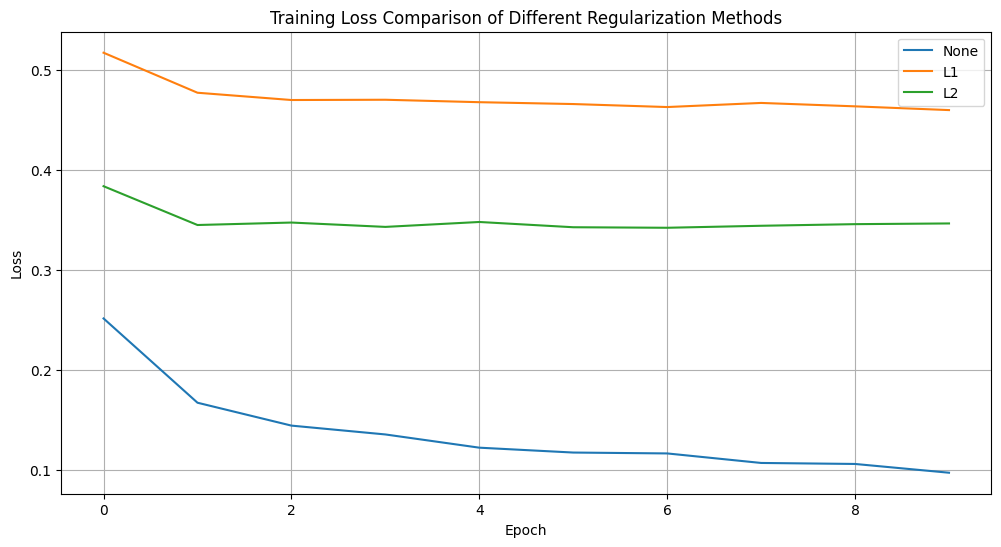

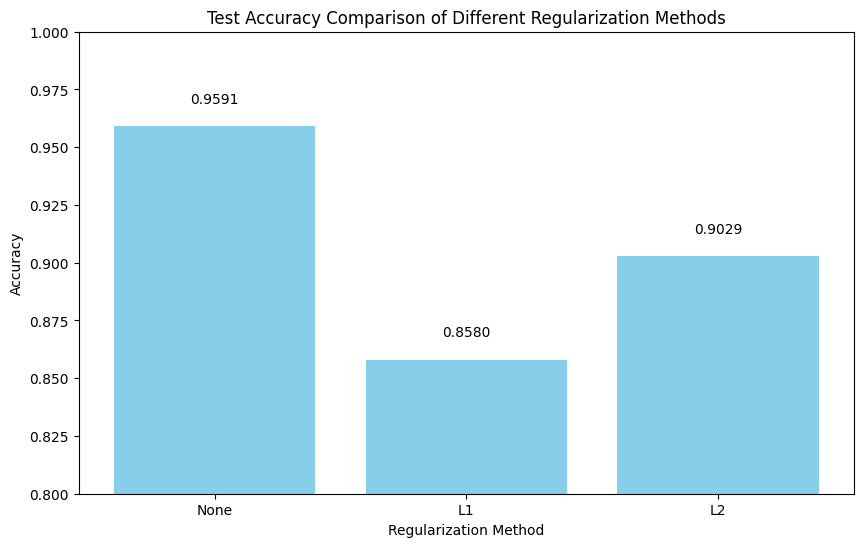

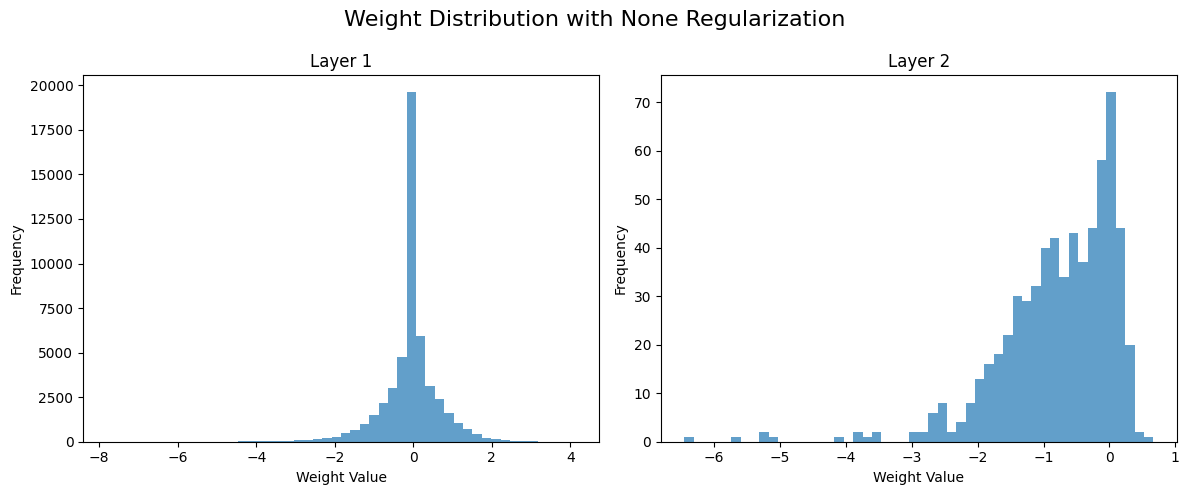

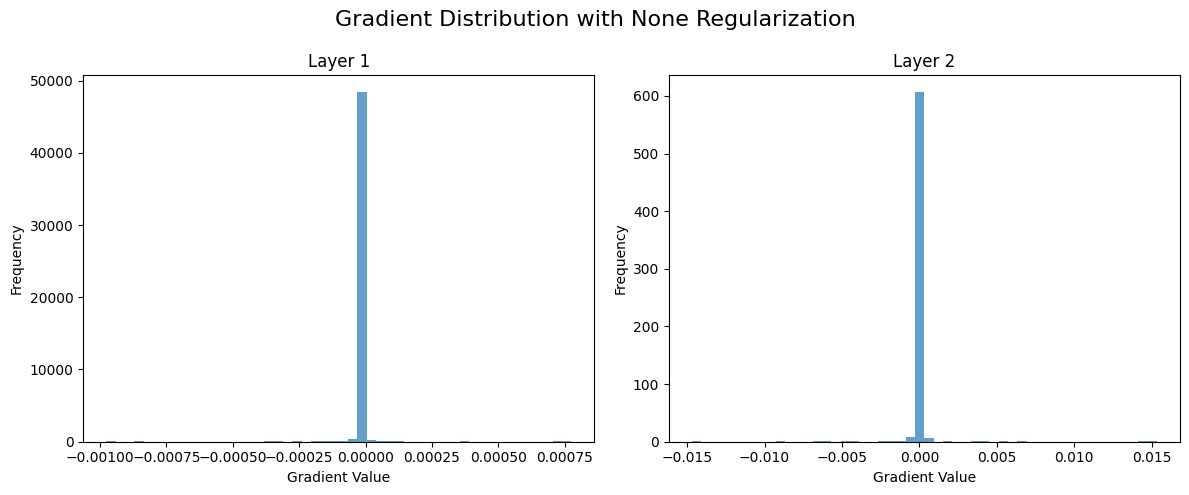

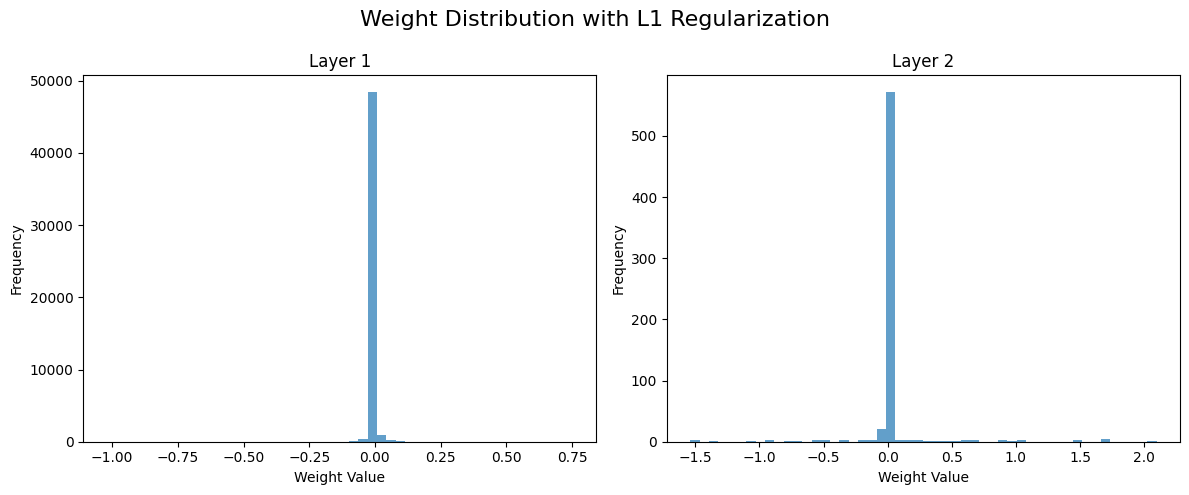

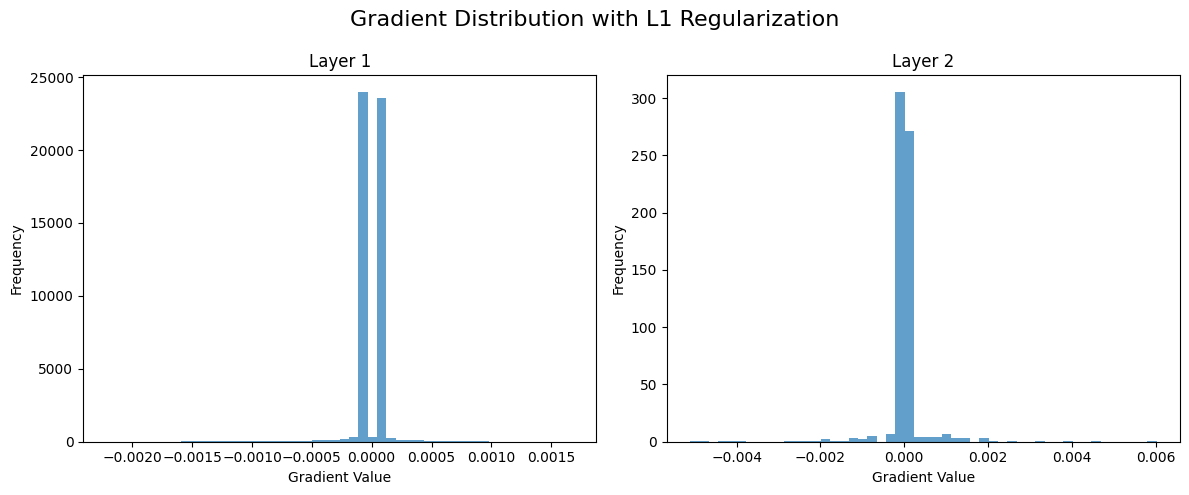

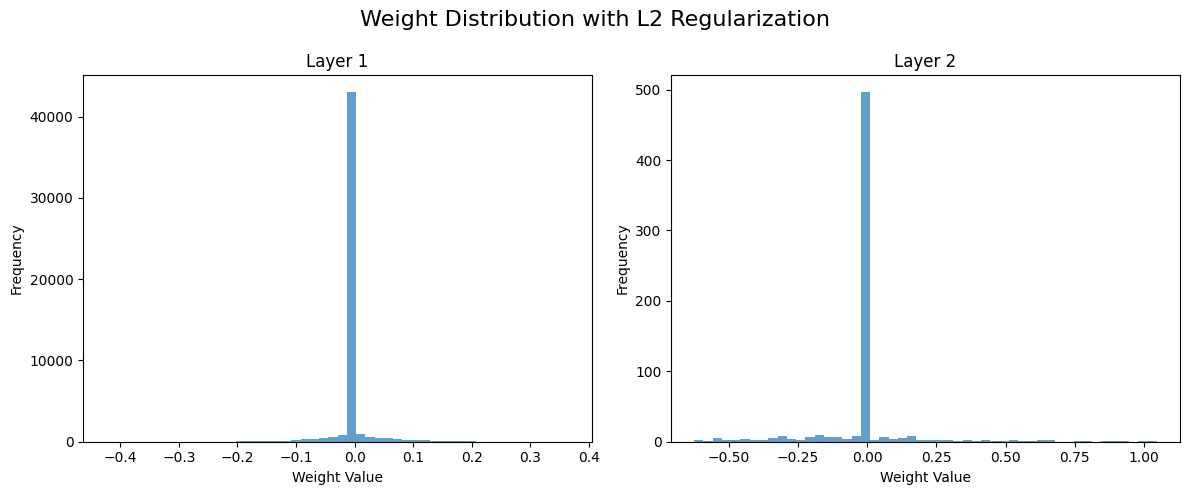

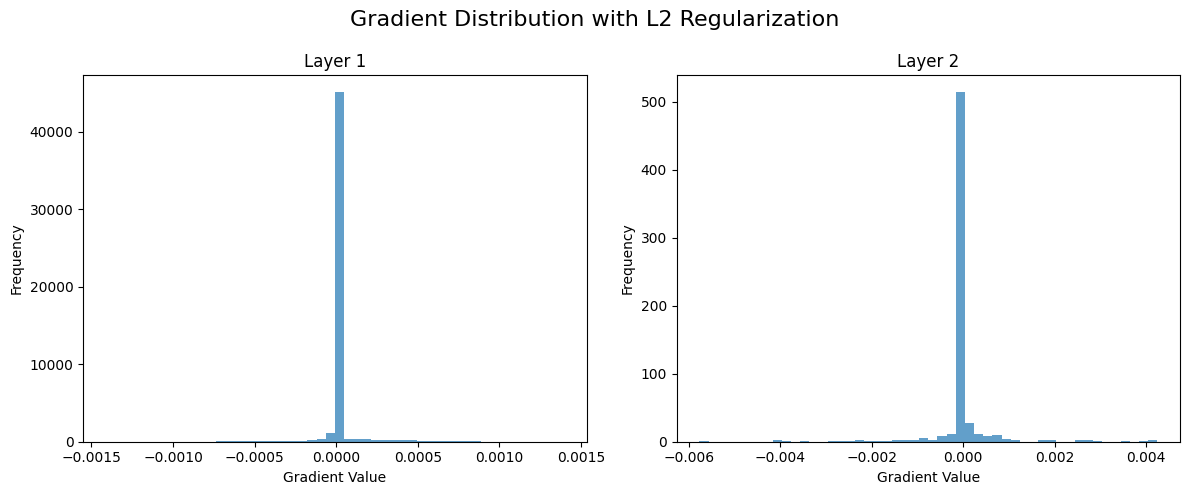

In [5]:
# Load MNIST dataset
# X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = load_mnist_data(subset_size=10000)
X_train, X_test, y_train, y_test, y_train_onehot, y_test_onehot = load_mnist_data()


input_size = X_train.shape[1]  # 784 for MNIST
output_size = y_train_onehot.shape[1]  # 10 for MNIST
hidden_size = 64  # Fixed hidden layer size for all experiments

# Experiment configurations
epochs = 10
batch_size = 32
learning_rate = 0.01

# Test different regularization methods
regularizers = [
    ("None", NoRegularizer()),
    ("L1", L1Regularizer(lambda_param=0.0001)),
    ("L2", L2Regularizer(lambda_param=0.0001))
]

reg_histories = []
reg_accuracies = []
trained_models = []

for name, regularizer in regularizers:
    model_name = f"FFNN with {name} regularization"
    print(f"\nTraining model with {name} regularization")
    
    model = create_model_with_regularizer(input_size, hidden_size, output_size, regularizer)
    
    history, accuracy, _, trained_model = train_and_evaluate(
        model, X_train, X_test, y_train_onehot, y_test, y_test_onehot,
        epochs=epochs, batch_size=batch_size, learning_rate=learning_rate,
        model_name=model_name
    )
    
    reg_histories.append(history)
    reg_accuracies.append(accuracy)
    trained_models.append(trained_model)

# Plot loss curves for all regularization methods
plt.figure(figsize=(12, 6))
for i, (name, _) in enumerate(regularizers):
    plt.plot(reg_histories[i]['loss'], label=f'{name}')

plt.title('Training Loss Comparison of Different Regularization Methods')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('../../out/regularization_comparison_loss.png')

# Bar chart of accuracies
plt.figure(figsize=(10, 6))
plt.bar([name for name, _ in regularizers], reg_accuracies, color='skyblue')
plt.title('Test Accuracy Comparison of Different Regularization Methods')
plt.xlabel('Regularization Method')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
for i, v in enumerate(reg_accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.savefig('../../out/regularization_comparison_accuracy.png')

# Plot weight and gradient distributions for each model
for i, (name, _) in enumerate(regularizers):
    model = trained_models[i]
    
    # Plot weight distributions
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Weight Distribution with {name} Regularization', fontsize=16)
    
    for j, layer in enumerate(model.layers):
        plt.subplot(1, len(model.layers), j+1)
        weights = layer.weights.flatten()
        plt.hist(weights, bins=50, alpha=0.7)
        plt.title(f'Layer {j+1}')
        plt.xlabel('Weight Value')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'../../out/regularization_{name}_weight_dist.png')
    
    # Plot gradient distributions
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Gradient Distribution with {name} Regularization', fontsize=16)
    
    for j, layer in enumerate(model.layers):
        plt.subplot(1, len(model.layers), j+1)
        gradients = layer.weights_grad.flatten()
        plt.hist(gradients, bins=50, alpha=0.7)
        plt.title(f'Layer {j+1}')
        plt.xlabel('Gradient Value')
        plt.ylabel('Frequency')
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'../../out/regularization_{name}_gradient_dist.png')

In [6]:
print("\nACCURACY RESULTS:")
for i, (name, _) in enumerate(regularizers):
    print(f"{name} Regularization: {reg_accuracies[i]:.4f}")

# Best and worst performing regularization methods
best_idx = np.argmax(reg_accuracies)
worst_idx = np.argmin(reg_accuracies)

print(f"\nBest performing: {regularizers[best_idx][0]} with accuracy {reg_accuracies[best_idx]:.4f}")
print(f"Worst performing: {regularizers[worst_idx][0]} with accuracy {reg_accuracies[worst_idx]:.4f}")


ACCURACY RESULTS:
None Regularization: 0.9591
L1 Regularization: 0.8580
L2 Regularization: 0.9029

Best performing: None with accuracy 0.9591
Worst performing: L1 with accuracy 0.8580
